In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import fisher_exact

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import ttest_ind

In [69]:
from scipy.stats import f_oneway

In [4]:
dffullunc = pd.read_csv("../commed/responsefin1.csv")
dffullunc.drop(columns='Timestamp', inplace=True)
dffullunc

,1. เพศ,2. อายุ,3. วอร์ดที่อยู่ปัจจุบัน,4. ท่านใช้หน้ากากอนามัยชนิดใดมากที่สุดระหว่างอยู่ที่วอร์ด,5. ท่านใช้หน้ากากอนามัยชนิดใดมากที่สุดเมื่ออยู่ที่หอพัก,6.ท่านใช้หน้ากากอนามัยชนิดใดมากที่สุดเมื่ออยู่นอกโรงพยาบาล,7.หน้ากากอนามัยที่โรงพยาบาลจัดให้เพียงพอหรือไม่ (โรงพยาบาลแจก 30 ชิ้นต่อเดือน),8. จากข้อ 7 ถ้าไม่เพียงพอ ท่านต้องการหน้ากากอนามัยกี่ชิ้นต่อเดือน (ตอบเป็นจำนวนชิ้นที่ต้องการต่อเดือน),9. ท่านใส่หน้ากากอนามัยเมื่ออยู่ในเขตที่อยู่อาศัย (บ้านหรือหอพัก) กับคนในครอบครัวหรือเพื่อนหรือไม่,10. ท่านทิ้งหน้ากากอนามัยที่ใช้แล้วเวลาใด,...,ในการใส่หน้ากากอนามัยหลังพับเก็บ ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [จับหน้ากากเฉพาะตรงเชือกที่ใช้คล้องหู],ในการใส่หน้ากากอนามัยหลังพับเก็บ ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [เอาเชือกคล้องหู แล้วใช้มือแนบหน้ากากกับใบหน้าให้สนิท พร้อมทั้งคลุมทั้งจมูก ปาก และคาง],ในการใส่หน้ากากอนามัยหลังพับเก็บ ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ล้างมืออีกครั้งหลังใส่หน้ากากอนามัย],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [ใส่หน้ากากอนามัยที่มีรอยฉีกขาดหรือเปียกชื้น],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [ใส่หน้ากากอนามัยปิดเพียงแค่ปากหรือจมูก],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [ใส่หน้ากากอนามัยที่สายรัดหลวม ไม่กระชับ],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [จับหน้ากากอนามัยด้านที่หันออกจากใบหน้า],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [เลื่อนหน้ากากอนามัยลงเพื่อพูด],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [วางหน้ากากอนามัยที่ใช้แล้วในบริเวณที่ผู้อื่นอาจสัมผัสโดน],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [ใช้หน้ากากอนามัยซ้ำ]
0,หญิง,23,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,...,ไม่ทำ,ทำ,ไม่ทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นประจำ,ไม่เคยทำ,ไม่เคยทำ,ทำเป็นบางครั้ง
1,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,...,ไม่ทำ,ไม่ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นประจำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ไม่เคยทำ
2,ชาย,22,Orthopedic,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,...,ไม่ทำ,ทำ,ไม่ทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นประจำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
3,ชาย,22,Psychology,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,...,ทำ,ทำ,ทำ,ไม่เคยทำ,ไม่เคยทำ,ไม่เคยทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นประจำ,ไม่เคยทำ
4,ชาย,22,Community medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,...,ไม่ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,...,ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ไม่เคยทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
98,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,...,ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
99,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,...,ทำ,ทำ,ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
100,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,...,ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ


# Part 1

In [5]:
df_part1 = dffullunc.iloc[:,:12]
colname = []
for i in range(1,13):
    colname.append('q'+str(i))
df_part1.columns = colname
df_part1

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
0,หญิง,23,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,ถังขยะทั่วไปไม่มีฝาปิด,ไม่พับ
1,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,ถังขยะทั่วไปไม่มีฝาปิด,ไม่พับ
2,ชาย,22,Orthopedic,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,ถังขยะทั่วไปไม่มีฝาปิด,ไม่พับ
3,ชาย,22,Psychology,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,ถังขยะทั่วไปไม่มีฝาปิด,พับด้านสีเข้มออกด้านนอก
4,ชาย,22,Community medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,ถังขยะทั่วไปมีฝาปิด,พับด้านสีเข้มออกด้านนอก
...,...,...,...,...,...,...,...,...,...,...,...,...
97,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,ถังขยะทั่วไปมีฝาปิด,พับด้านสีเข้มออกด้านนอก
98,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,ถังขยะทั่วไปไม่มีฝาปิด,ไม่พับ
99,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,ถังขยะทั่วไปมีฝาปิด,พับด้านสีเข้มออกด้านนอก
100,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,ถังขยะทั่วไปไม่มีฝาปิด,ไม่พับ


In [6]:
df_part1.replace('ถังขยะทั่วไปไม่มีฝาปิด','wrong',inplace=True)
df_part1.replace('ถังขยะทั่วไปมีฝาปิด','right',inplace=True)
df_part1.replace('ถังขยะติดเชื้อ','right',inplace=True)
df_part1

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
0,หญิง,23,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,ไม่พับ
1,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,ไม่พับ
2,ชาย,22,Orthopedic,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,wrong,ไม่พับ
3,ชาย,22,Psychology,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,พับด้านสีเข้มออกด้านนอก
4,ชาย,22,Community medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,right,พับด้านสีเข้มออกด้านนอก
...,...,...,...,...,...,...,...,...,...,...,...,...
97,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,right,พับด้านสีเข้มออกด้านนอก
98,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,ไม่พับ
99,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,right,พับด้านสีเข้มออกด้านนอก
100,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,ไม่พับ


In [7]:
df_part1.replace('ไม่พับ','wrong',inplace=True)
df_part1.replace('พับด้านสีเข้มเข้าด้านใน','wrong',inplace=True)
df_part1.replace('พับด้านสีเข้มออกด้านนอก','right',inplace=True)
df_part1

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
0,หญิง,23,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,wrong
1,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,wrong
2,ชาย,22,Orthopedic,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,wrong,wrong
3,ชาย,22,Psychology,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,right
4,ชาย,22,Community medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,right,right
...,...,...,...,...,...,...,...,...,...,...,...,...
97,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,right,right
98,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,wrong
99,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,right,right
100,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,wrong


In [8]:
def fisherex(x,y):
    ct = pd.crosstab(x,y)
    odds, p = fisher_exact(ct)
    print (ct)
    print ('p-value = ' + str(p))

# Start here

In [9]:
# 1 sex vs maskatward
fisherex(df_part1.q1,df_part1.q4)

q4    หน้ากาก FFP1  หน้ากากอนามัยทางการแพทย์
q1                                          
ชาย              1                        49
หญิง             0                        52
p-value = 0.4901960784313725


In [10]:
# 2 sex vs maskatdorm
ct2 = pd.crosstab(df_part1.q1,df_part1.q5)
print (ct2)
print ('p-value = 0.4864')
#calc form Rstudio

q5    หน้ากาก FFP1  หน้ากากผ้า  หน้ากากฟองน้ำ  หน้ากากอนามัยทางการแพทย์
q1                                                                     
ชาย              1           1              1                        47
หญิง             0           3              0                        49
p-value = 0.4864


In [11]:
# 3 sex vs maskoutside
ct3 = pd.crosstab(df_part1.q1,df_part1.q6)
print (ct3)
print ('p-value = 0.8912')
#calc form Rstudio

q6    หน้ากากกระดาษ  หน้ากากผ้า  หน้ากากฟองน้ำ  หน้ากากอนามัยทางการแพทย์
q1                                                                      
ชาย               0           3              2                        45
หญิง              1           5              2                        44
p-value = 0.8912


In [12]:
# 4 sex vs maskwithfam
fisherex(df_part1.q1,df_part1.q9)

q9    ใส่  ไม่ใส่
q1               
ชาย     7      43
หญิง    0      52
p-value = 0.0054088186259499405


In [13]:
# 5 sex vs discardwhen
ct5 = pd.crosstab(df_part1.q1,df_part1.q10)
ct5

q10,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว
q1,,
ชาย,12,38
หญิง,13,39


In [15]:
# 5 cont'
_, p5 = fisher_exact(ct5)
print ('p-value =' + str(p5))

p-value =1.0


In [16]:
# 6 sex vs bin
fisherex(df_part1.q1,df_part1.q11)

q11   right  wrong
q1                
ชาย      21     29
หญิง     30     22
p-value = 0.16530586112156564


In [17]:
# 7 sex vs fold
fisherex(df_part1.q1,df_part1.q12)

q12   right  wrong
q1                
ชาย      17     33
หญิง     14     38
p-value = 0.5201323006806209


# By ward

In [18]:
df_part1.groupby('q3').count()

,q1,q2,q4,q5,q6,q7,q8,q9,q10,q11,q12
q3,,,,,,,,,,,
Anesthesiology,6,6,6,6,6,6,0,6,6,6,6
Community medicine,26,26,26,26,26,26,4,26,26,26,26
Medicine,34,34,34,34,34,34,0,34,34,34,34
Ophthalmology,6,6,6,6,6,6,0,6,6,6,6
Orthopedic,10,10,10,10,10,10,0,10,10,10,10
Otolaryngology,5,5,5,5,5,5,0,5,5,5,5
Psychology,10,10,10,10,10,10,1,10,10,10,10
Rehabilitation,5,5,5,5,5,5,0,5,5,5,5


In [19]:
df_ward = df_part1.copy()
df_ward

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
0,หญิง,23,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,wrong
1,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,wrong
2,ชาย,22,Orthopedic,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,wrong,wrong
3,ชาย,22,Psychology,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,right
4,ชาย,22,Community medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,right,right
...,...,...,...,...,...,...,...,...,...,...,...,...
97,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,right,right
98,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,wrong
99,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,right,right
100,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,wrong


In [20]:
df_ward.replace('Anesthesiology','AnesOrtho',inplace=True)
df_ward.replace('Orthopedic','AnesOrtho',inplace=True)
df_ward.replace('Psychology','PsychiRehab',inplace=True)
df_ward.replace('Rehabilitation','PsychiRehab',inplace=True)
df_ward.replace('Ophthalmology','EyeEnt',inplace=True)
df_ward.replace('Otolaryngology','EyeEnt',inplace=True)
df_ward

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
0,หญิง,23,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,wrong
1,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,wrong
2,ชาย,22,AnesOrtho,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,wrong,wrong
3,ชาย,22,PsychiRehab,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,right
4,ชาย,22,Community medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,right,right
...,...,...,...,...,...,...,...,...,...,...,...,...
97,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,right,right
98,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,wrong
99,หญิง,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ,right,right
100,ชาย,22,Medicine,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,หน้ากากอนามัยทางการแพทย์,เพียงพอ,NaN,ไม่ใส่,หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว,wrong,wrong


In [28]:
# ward vs discard when
print (pd.crosstab(df_ward.q3,df_ward.q10))
print ('p value = 0.06555')

q10                 หลังเดินทางกลับที่พัก ก่อนไปทำกิจกรรมอื่นๆต่อ  \
q3                                                                  
AnesOrtho                                                       6   
Community medicine                                              6   
EyeEnt                                                          2   
Medicine                                                       11   
PsychiRehab                                                     0   

q10                 หลังเสร็จกิจกรรมที่ต้องทำทั้งวันแล้ว  
q3                                                        
AnesOrtho                                             10  
Community medicine                                    20  
EyeEnt                                                 9  
Medicine                                              23  
PsychiRehab                                           15  
p value = 0.06555


In [30]:
# ward vs bin
print(pd.crosstab(df_ward.q3,df_ward.q11))
print('p value = 0.3745')

q11                 right  wrong
q3                              
AnesOrtho              10      6
Community medicine     13     13
EyeEnt                  3      8
Medicine               19     15
PsychiRehab             6      9
p value = 0.3745


In [32]:
# ward vs fold
print (pd.crosstab(df_ward.q3,df_ward.q12))
print ('p value = 0.7031')

q12                 right  wrong
q3                              
AnesOrtho               3     13
Community medicine      7     19
EyeEnt                  3      8
Medicine               12     22
PsychiRehab             6      9
p value = 0.7031


# Part 2 Checklist

In [34]:
df_part2 = dffullunc.iloc[:,12:]
df_part2

,ในการใส่หน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ล้างมือก่อนใส่หน้ากากอนามัย],ในการใส่หน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ตรวจสอบหน้ากากอนามัยว่ามีรูทะลุหรือรอยฉีกขาดก่อนใส่],ในการใส่หน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ใส่หน้ากากอนามัยโดยเอาขอบที่มีลวดไว้ด้านบน],ในการใส่หน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ใส่หน้ากากอนามัยโดยนำด้านสีเข้มออกด้านนอก],ในการใส่หน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [กดด้านขอบที่มีลวดให้แนบพอดีกับจมูก],"ในการใส่หน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ใส่หน้ากากอนามัยให้ปกปิดจมูก, ปากและคาง]",ในการถอดหน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ถอดหน้ากากโดยการจับสายรัดหลังหู],ในการถอดหน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [หลีกเลี่ยงไม่ให้หน้ากากสัมผัสใกล้ชิดตัวหลังถอด],ในการถอดหน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ทิ้งหน้ากากอนามัยทันทีหลังถอดลงในถังขยะติดเชื้อหรือถังขยะที่มีฝาปิด],ในการถอดหน้ากากอนามัย ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ล้างมือให้สะอาดหลังถอด],...,ในการใส่หน้ากากอนามัยหลังพับเก็บ ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [จับหน้ากากเฉพาะตรงเชือกที่ใช้คล้องหู],ในการใส่หน้ากากอนามัยหลังพับเก็บ ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [เอาเชือกคล้องหู แล้วใช้มือแนบหน้ากากกับใบหน้าให้สนิท พร้อมทั้งคลุมทั้งจมูก ปาก และคาง],ในการใส่หน้ากากอนามัยหลังพับเก็บ ท่านได้ทำตามขั้นตอนเหล่านี้หรือไม่ [ล้างมืออีกครั้งหลังใส่หน้ากากอนามัย],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [ใส่หน้ากากอนามัยที่มีรอยฉีกขาดหรือเปียกชื้น],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [ใส่หน้ากากอนามัยปิดเพียงแค่ปากหรือจมูก],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [ใส่หน้ากากอนามัยที่สายรัดหลวม ไม่กระชับ],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [จับหน้ากากอนามัยด้านที่หันออกจากใบหน้า],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [เลื่อนหน้ากากอนามัยลงเพื่อพูด],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [วางหน้ากากอนามัยที่ใช้แล้วในบริเวณที่ผู้อื่นอาจสัมผัสโดน],ท่านได้ทำพฤติกรรมเหล่านี้บ่อยเพียงใด [ใช้หน้ากากอนามัยซ้ำ]
0,ไม่ทำ,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ทำ,ไม่ทำ,ทำ,...,ไม่ทำ,ทำ,ไม่ทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นประจำ,ไม่เคยทำ,ไม่เคยทำ,ทำเป็นบางครั้ง
1,ไม่ทำ,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,ไม่ทำ,...,ไม่ทำ,ไม่ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นประจำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ไม่เคยทำ
2,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,ไม่ทำ,ไม่ทำ,...,ไม่ทำ,ทำ,ไม่ทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นประจำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
3,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,...,ทำ,ทำ,ทำ,ไม่เคยทำ,ไม่เคยทำ,ไม่เคยทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นประจำ,ไม่เคยทำ
4,ไม่ทำ,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,...,ไม่ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,...,ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ไม่เคยทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
98,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,...,ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
99,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,...,ทำ,ทำ,ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
100,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,ไม่ทำ,...,ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ


In [35]:
colname2 = []
for i in range(1,7):
    colname2.append('wear'+str(i))
for i in range(1,5):
    colname2.append('discard'+str(i))
for i in range(1,5):
    colname2.append('keep'+str(i))
for i in range(1,5):
    colname2.append('after'+str(i))
for i in range(1,8):
    colname2.append('habit'+str(i))
df_part2.columns = colname2
df_part2

,wear1,wear2,wear3,wear4,wear5,wear6,discard1,discard2,discard3,discard4,...,after2,after3,after4,habit1,habit2,habit3,habit4,habit5,habit6,habit7
0,ไม่ทำ,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ทำ,ไม่ทำ,ทำ,...,ไม่ทำ,ทำ,ไม่ทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นประจำ,ไม่เคยทำ,ไม่เคยทำ,ทำเป็นบางครั้ง
1,ไม่ทำ,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,ไม่ทำ,...,ไม่ทำ,ไม่ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นประจำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ไม่เคยทำ
2,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,ไม่ทำ,ไม่ทำ,...,ไม่ทำ,ทำ,ไม่ทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นประจำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
3,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,...,ทำ,ทำ,ทำ,ไม่เคยทำ,ไม่เคยทำ,ไม่เคยทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นประจำ,ไม่เคยทำ
4,ไม่ทำ,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,...,ไม่ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,...,ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ไม่เคยทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
98,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,...,ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
99,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,...,ทำ,ทำ,ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ
100,ไม่ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ทำ,ไม่ทำ,ไม่ทำ,ไม่ทำ,...,ทำ,ทำ,ไม่ทำ,ไม่เคยทำ,ทำเป็นบางครั้ง,ไม่เคยทำ,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ทำเป็นบางครั้ง,ไม่เคยทำ


In [36]:
df_part2.replace('ทำ',1,inplace=True)
df_part2.replace('ไม่ทำ',0,inplace=True)
df_part2.replace('ทำ;ไม่ทำ',0,inplace=True)
df_part2.replace('ไม่เคยทำ',1,inplace=True)
df_part2.replace('ทำเป็นบางครั้ง',0.5,inplace=True)
df_part2.replace('ทำเป็นประจำ',0,inplace=True)
df_part2.replace('ทำเป็นประจำ;ทำเป็นบางครั้ง',0.5,inplace=True)
df_part2

,wear1,wear2,wear3,wear4,wear5,wear6,discard1,discard2,discard3,discard4,...,after2,after3,after4,habit1,habit2,habit3,habit4,habit5,habit6,habit7
0,0,0,1,1,1,1,0,1,0,1,...,0,1,0,0.5,1.0,0.5,0.0,1.0,1.0,0.5
1,0,0,1,1,1,1,1,0,0,0,...,0,0,0,1.0,0.5,1.0,0.0,0.5,1.0,1.0
2,0,1,1,1,1,1,0,0,0,0,...,0,1,0,0.5,0.5,1.0,0.0,0.5,0.5,1.0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,0.5,0.0,1.0
4,0,0,1,1,1,1,1,1,1,0,...,0,1,0,1.0,0.5,1.0,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1,1,1,1,1,1,1,1,1,0,...,1,1,0,1.0,1.0,1.0,0.5,0.5,0.5,1.0
98,0,1,1,1,1,1,1,1,0,0,...,1,1,0,1.0,0.5,1.0,0.5,0.5,0.5,1.0
99,0,1,1,1,1,1,1,1,0,0,...,1,1,1,1.0,0.5,1.0,0.5,0.5,0.5,1.0
100,0,1,1,1,1,1,1,0,0,0,...,1,1,0,1.0,0.5,1.0,0.5,0.5,0.5,1.0


# Start here

In [37]:
df_part2.sum(axis=0)/102*100
# percent right

wear1        15.686275
wear2        54.901961
wear3        96.078431
wear4       100.000000
wear5        99.019608
wear6        97.058824
discard1     85.294118
discard2     49.019608
discard3     38.235294
discard4     25.490196
keep1        76.470588
keep2        27.450980
keep3        28.431373
keep4        19.607843
after1       13.725490
after2       61.764706
after3       84.313725
after4       12.745098
habit1       89.705882
habit2       65.686275
habit3       84.313725
habit4       45.098039
habit5       48.529412
habit6       63.725490
habit7       67.647059
dtype: float64

### all steps

คะแนนเต็ม 25 คะแนน

In [41]:
df_individual = df_part2.sum(axis=1)
df_individual

0      13.5
1      10.0
2      11.0
3      23.5
4      13.5
       ... 
97     17.5
98     15.0
99     16.0
100    14.0
101    15.5
Length: 102, dtype: float64

In [39]:
# stat for all steps
df_individual.to_frame().describe()

,0
count,102.000000
mean,14.500000
std,3.301665
min,7.500000
25%,12.500000
50%,14.250000
75%,15.875000
max,23.500000


(array([ 5.,  6.,  9., 25., 19., 21.,  8.,  1.,  4.,  4.]),
 array([ 7.5,  9.1, 10.7, 12.3, 13.9, 15.5, 17.1, 18.7, 20.3, 21.9, 23.5]),
 <a list of 10 Patch objects>)

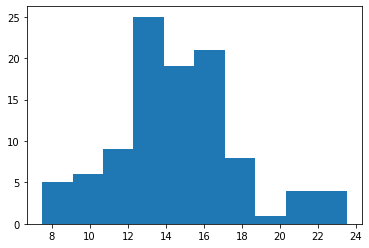

In [40]:
plt.hist(df_individual)

### Wear

In [42]:
df_wear = df_part2.iloc[:,:6].sum(axis=1)
df_wear

0      4
1      4
2      5
3      6
4      4
      ..
97     6
98     5
99     5
100    5
101    5
Length: 102, dtype: int64

In [43]:
df_wear.to_frame().describe()

,0
count,102.000000
mean,4.627451
std,0.769744
min,3.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,6.000000


(array([ 7.,  0.,  0., 35.,  0.,  0., 49.,  0.,  0., 11.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <a list of 10 Patch objects>)

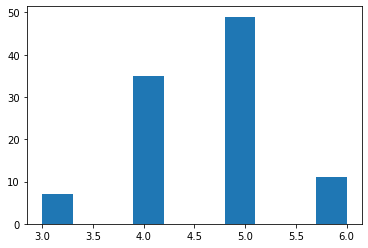

In [44]:
plt.hist(df_wear)

In [45]:
df_wear.value_counts()

5    49
4    35
6    11
3     7
dtype: int64

### discard

In [47]:
df_discard = df_part2.iloc[:,6:10].sum(axis=1)
df_discard

0      2
1      1
2      0
3      4
4      3
      ..
97     3
98     2
99     2
100    1
101    2
Length: 102, dtype: int64

In [48]:
df_discard.to_frame().describe()

,0
count,102.000000
mean,1.980392
std,1.116753
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


(array([ 7.,  0., 32.,  0.,  0., 30.,  0., 22.,  0., 11.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

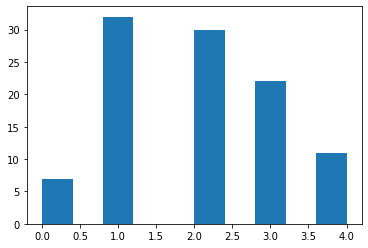

In [49]:
plt.hist(df_discard)

In [50]:
df_discard.value_counts()

1    32
2    30
3    22
4    11
0     7
dtype: int64

### Keep

In [51]:
df_keep = df_part2.iloc[:,10:14].sum(axis=1)
df_keep

0      2
1      0
2      1
3      4
4      1
      ..
97     1
98     1
99     1
100    1
101    1
Length: 102, dtype: int64

In [52]:
df_keep.to_frame().describe()

,0
count,102.000000
mean,1.519608
std,1.087557
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


(array([12.,  0., 51.,  0.,  0., 22.,  0.,  8.,  0.,  9.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

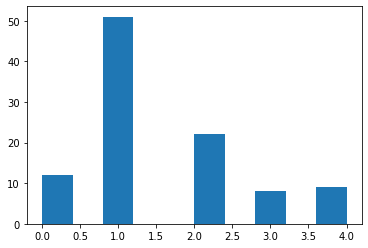

In [53]:
plt.hist(df_keep)

In [54]:
df_keep.value_counts()

1    51
2    22
0    12
4     9
3     8
dtype: int64

### After Keep

In [55]:
df_after = df_part2.iloc[:,14:18].sum(axis=1)
df_after

0      1
1      0
2      1
3      4
4      1
      ..
97     2
98     2
99     3
100    2
101    2
Length: 102, dtype: int64

In [56]:
df_after.to_frame().describe()

,0
count,102.000000
mean,1.725490
std,0.986612
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,4.000000


(array([11.,  0., 28.,  0.,  0., 47.,  0., 10.,  0.,  6.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

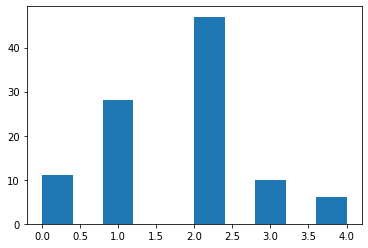

In [57]:
plt.hist(df_after)

In [58]:
df_after.value_counts()

2    47
1    28
0    11
3    10
4     6
dtype: int64

### Habit

พาร์ทพฤติกรรม ถ้าไม่เคยทำได้ 1 ทำเป็นบางครั้ง 0.5 ทำเป็นประจำ 0

In [59]:
df_habit = df_part2.iloc[:,18:].sum(axis=1)
df_habit

0      4.5
1      5.0
2      4.0
3      5.5
4      4.5
      ... 
97     5.5
98     5.0
99     5.0
100    5.0
101    5.5
Length: 102, dtype: float64

In [60]:
df_habit.to_frame().describe()

,0
count,102.000000
mean,4.647059
std,1.023458
min,1.000000
25%,4.000000
50%,4.500000
75%,5.375000
max,7.000000


(array([ 1.,  0.,  4.,  3., 11., 33., 24., 16.,  4.,  6.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

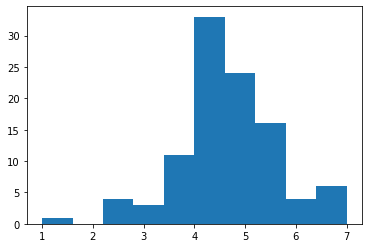

In [61]:
plt.hist(df_habit)

In [62]:
df_habit.value_counts()

5.0    24
4.5    23
5.5    16
3.5    11
4.0    10
6.5     4
2.5     4
6.0     4
3.0     3
7.0     2
1.0     1
dtype: int64

## Sex vs Checklist

In [63]:
df_part3 = df_part2.copy()
df_part3['sex'] = df_part1['q1']
fixed_columns = [df_part3.columns[-1]] + list(df_part3.columns[:-1])
df_part3 = df_part3[fixed_columns]
df_part3

,sex,wear1,wear2,wear3,wear4,wear5,wear6,discard1,discard2,discard3,...,after2,after3,after4,habit1,habit2,habit3,habit4,habit5,habit6,habit7
0,หญิง,0,0,1,1,1,1,0,1,0,...,0,1,0,0.5,1.0,0.5,0.0,1.0,1.0,0.5
1,ชาย,0,0,1,1,1,1,1,0,0,...,0,0,0,1.0,0.5,1.0,0.0,0.5,1.0,1.0
2,ชาย,0,1,1,1,1,1,0,0,0,...,0,1,0,0.5,0.5,1.0,0.0,0.5,0.5,1.0
3,ชาย,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,0.5,0.0,1.0
4,ชาย,0,0,1,1,1,1,1,1,1,...,0,1,0,1.0,0.5,1.0,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,ชาย,1,1,1,1,1,1,1,1,1,...,1,1,0,1.0,1.0,1.0,0.5,0.5,0.5,1.0
98,หญิง,0,1,1,1,1,1,1,1,0,...,1,1,0,1.0,0.5,1.0,0.5,0.5,0.5,1.0
99,หญิง,0,1,1,1,1,1,1,1,0,...,1,1,1,1.0,0.5,1.0,0.5,0.5,0.5,1.0
100,ชาย,0,1,1,1,1,1,1,0,0,...,1,1,0,1.0,0.5,1.0,0.5,0.5,0.5,1.0


In [64]:
df_sex_check = df_part3['sex'].copy().to_frame()
df_sex_check['allsteps'] = df_individual
df_sex_check

,sex,allsteps
0,หญิง,13.5
1,ชาย,10.0
2,ชาย,11.0
3,ชาย,23.5
4,ชาย,13.5
...,...,...
97,ชาย,17.5
98,หญิง,15.0
99,หญิง,16.0
100,ชาย,14.0


# vvv คะแนนโดยเฉลี่ยแยกตามเพศ

In [66]:
df_scm = df_sex_check.groupby('sex').mean()
df_scm

,allsteps
sex,
ชาย,14.100000
หญิง,14.884615


In [65]:
df_female = df_sex_check.loc[df_sex_check['sex'] == 'หญิง']
df_female.set_index('sex',inplace = True)

In [67]:
df_male = df_sex_check.loc[df_sex_check['sex'] == 'ชาย']
df_male.set_index('sex',inplace = True)

# T-test เพศกับคะแนน p=0.23

In [68]:
ttest_ind(df_female, df_male)

Ttest_indResult(statistic=array([1.20244983]), pvalue=array([0.23202879]))

# Ward กับ Checklist

In [72]:
df_ward_check = df_ward['q3'].copy().to_frame()
df_ward_check['allsteps'] = df_individual
df_ward_check

,q3,allsteps
0,Medicine,13.5
1,Medicine,10.0
2,AnesOrtho,11.0
3,PsychiRehab,23.5
4,Community medicine,13.5
...,...,...
97,Medicine,17.5
98,Medicine,15.0
99,Medicine,16.0
100,Medicine,14.0


In [73]:
df_wcm = df_ward_check.groupby('q3').mean()
df_wcm

,allsteps
q3,
AnesOrtho,14.062500
Community medicine,14.288462
EyeEnt,14.272727
Medicine,14.161765
PsychiRehab,16.266667


In [86]:
df_anor = df_ward_check.loc[df_ward_check['q3'] == 'AnesOrtho']
df_anor.set_index('q3',inplace = True)
df_commed = df_ward_check.loc[df_ward_check['q3'] == 'Community medicine']
df_commed.set_index('q3',inplace = True)
df_med = df_ward_check.loc[df_ward_check['q3'] == 'Medicine']
df_med.set_index('q3',inplace = True)
df_ee = df_ward_check.loc[df_ward_check['q3'] == 'EyeEnt']
df_ee.set_index('q3',inplace = True)
df_pr = df_ward_check.loc[df_ward_check['q3'] == 'PsychiRehab']
df_pr.set_index('q3',inplace = True)

# One-way ANOVA ward vs checklist p=0.28

In [87]:
f_oneway(df_anor,df_commed,df_med,df_ee,df_pr)

F_onewayResult(statistic=array([1.28731533]), pvalue=array([0.28034331]))